<a href="https://colab.research.google.com/github/Sulbae/Latihan-Membangun-Sistem-Machine-Learning/blob/main/Template_Eksperimen_MSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [253]:
import mlflow
import dagshub
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# **Memuat Preprocessed Data**

## Classifier Data

In [194]:
clf_train = pd.read_csv('../preprocessing/clf_train_preprocessed.csv')
clf_test = pd.read_csv('../preprocessing/clf_test_preprocessed.csv')

In [195]:
clf_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505288,0.371295,0.048040,-0.791809,2.052308,0.925183,0.565242,-0.365393,-0.177457,0
1,-0.709433,0.935084,-1.016080,0.850917,1.617777,-1.501693,-2.169448,-1.581404,-0.486502,1
2,0.929048,0.980710,0.808192,-0.585714,-0.019216,-0.818137,0.085404,-0.351573,0.547202,0
3,-0.227728,0.671248,-0.001853,0.030738,-0.019216,-0.677955,0.774861,0.501623,-0.091554,0
4,-0.390242,0.176673,-0.548156,-0.571875,-0.196177,0.665479,0.686438,-1.263826,-0.544746,0


In [196]:
clf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [197]:
clf_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.030569,-0.238336,-0.325470,-0.676788,-0.019216,-0.492411,0.265884,0.781086,-1.602336,1
1,-0.617506,-0.267650,-1.300395,0.379131,-0.310487,0.484065,2.112074,0.126600,0.200210,0
2,-0.030569,-0.617017,0.469844,0.433350,0.680667,-1.134013,0.053165,1.523568,0.559978,0
3,-0.483725,1.189652,1.435043,1.284983,-1.060448,-0.871123,-1.535066,-0.435916,-2.176229,0
4,-0.639037,0.041532,0.548021,0.294471,-0.125254,1.484732,0.474402,-1.576772,1.776070,0


In [198]:
clf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               656 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          656 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  656 non-null    float64
 8   Turbidity        656 non-null    float64
 9   Potability       656 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 51.4 KB


## Anomali Detection Data

In [199]:
anom_train = pd.read_csv('../preprocessing/anom_train_preprocessed.csv')
anom_test = pd.read_csv('../preprocessing/anom_test_preprocessed.csv')

In [200]:
anom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1598 non-null   float64
 1   Hardness         1598 non-null   float64
 2   Solids           1598 non-null   float64
 3   Chloramines      1598 non-null   float64
 4   Sulfate          1598 non-null   float64
 5   Conductivity     1598 non-null   float64
 6   Organic_carbon   1598 non-null   float64
 7   Trihalomethanes  1598 non-null   float64
 8   Turbidity        1598 non-null   float64
dtypes: float64(9)
memory usage: 112.5 KB


In [201]:
anom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               656 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          656 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  656 non-null    float64
 8   Turbidity        656 non-null    float64
dtypes: float64(9)
memory usage: 46.3 KB


In [202]:
anom_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505288,0.371295,0.048040,-0.791809,2.052308,0.925183,0.565242,-0.365393,-0.177457
1,0.929048,0.980710,0.808192,-0.585714,-0.019216,-0.818137,0.085404,-0.351573,0.547202
2,-0.227728,0.671248,-0.001853,0.030738,-0.019216,-0.677955,0.774861,0.501623,-0.091554
3,-0.390242,0.176673,-0.548156,-0.571875,-0.196177,0.665479,0.686438,-1.263826,-0.544746
4,0.449462,-0.428413,-0.248282,1.087002,1.340682,0.755374,-1.640136,-0.524746,-0.554306


In [203]:
anom_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.030569,-0.238336,-0.325470,-0.676788,-0.019216,-0.492411,0.265884,0.781086,-1.602336
1,-0.617506,-0.267650,-1.300395,0.379131,-0.310487,0.484065,2.112074,0.126600,0.200210
2,-0.030569,-0.617017,0.469844,0.433350,0.680667,-1.134013,0.053165,1.523568,0.559978
3,-0.483725,1.189652,1.435043,1.284983,-1.060448,-0.871123,-1.535066,-0.435916,-2.176229
4,-0.639037,0.041532,0.548021,0.294471,-0.125254,1.484732,0.474402,-1.576772,1.776070


# Modelling

## Classifier Model

### Training

In [170]:
clf_X_train = clf_train.drop('Potability', axis=1)
clf_y_train = clf_train['Potability']

clf_X_test = clf_test.drop('Potability', axis=1)
clf_y_test = clf_test['Potability']

In [171]:
# Model Random Forest Classifier
model_clf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
)

In [172]:
N_ESTIMATORS_RANGE = np.linspace(10, 100, 3, dtype=int)
MAX_DEPTH_RANGE = np.linspace(1, 50, 3, dtype=int)
MIN_SAMPLES_LEAF = np.linspace(1, 10, 3, dtype=int)
MIN_SAMPLES_SPLIT = np.linspace(2, 10, 3, dtype=int)

In [173]:
param_grid = {
    'n_estimators': N_ESTIMATORS_RANGE,   
    'max_depth': MAX_DEPTH_RANGE,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'min_samples_split': MIN_SAMPLES_SPLIT
}

In [174]:
grid_search = GridSearchCV(
    estimator=model_clf,
    param_grid=param_grid,
    cv=3,                 
    scoring = {
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    },
    refit = 'precision',
    n_jobs=-1,
    verbose=2
)

In [175]:
grid_search.fit(clf_X_train, clf_y_train)

best_model = grid_search.best_estimator_

grid_search.cv_results_['mean_test_precision']
grid_search.cv_results_['mean_test_recall']
grid_search.cv_results_['mean_test_f1']

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.6296893811562473


In [256]:
# save classifier model ke dalam  folder artifacts
with open('../artifacts/rf_classifier_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### Evaluation

In [234]:
y_prob_clf = best_model.predict_proba(clf_X_test)[:,1]
y_pred_clf = (y_prob_clf >= 0.69).astype(int) # Threshold klasifikasi

In [235]:
# Evaluasi model
precision = precision_score(clf_y_test, y_pred_clf)
recall = recall_score(clf_y_test, y_pred_clf)
f1 = f1_score(clf_y_test, y_pred_clf)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 0.0546875
F1 Score: 0.1037037037037037


In [178]:
# Feature Importance
# feature_importance = grid_search.best_estimator_.feature_importances_
# print("Feature Importances:", feature_importance)

In [236]:
# Classification report
print(classification_report(clf_y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       400
           1       1.00      0.05      0.10       256

    accuracy                           0.63       656
   macro avg       0.81      0.53      0.44       656
weighted avg       0.77      0.63      0.51       656



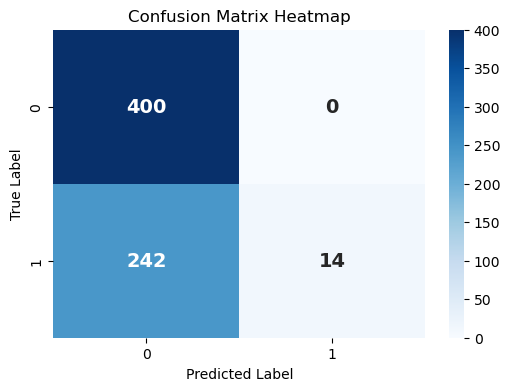

In [237]:
# Confusion matrix
conf_matrix = confusion_matrix(clf_y_test, y_pred_clf)

# heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Anomali Detection Model

### Training

In [223]:
# Model Isolation Forest
model_anom = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.05,
    random_state=42,
    n_jobs=-1,
)

In [224]:
model_anom.fit(anom_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


In [257]:
# save anomaly detection model ke dalam  folder artifacts
with open('../artifacts/anomaly_detection_model.pkl', 'wb') as f:
    pickle.dump(model_anom, f)

### Evaluation

In [225]:
# Prediksi anomali
anom_flag_test = model_anom.predict(anom_test)

anom_score_test = model_anom.decision_function(anom_test)

In [226]:
# Cek anomali rate pada data Test
anom_test_anomaly_ratio = np.mean(anom_flag_test == -1)
print(f"Anomaly Ratio: {anom_test_anomaly_ratio:.2%}")

Anomaly Ratio: 6.25%


Jika proporsi/rate: 
* '<1%' --> model terlalu primitif, 
* '1-15%' --> sehat/umum,
* '>15%' --> data terlalu noisy/contamination terlalu tinggi, model terlalu sensitif

In [227]:
# Distribusi skor anomali pada data Test
anom_score_test.min(), anom_score_test.mean(), anom_score_test.max()

(-0.06617311742420151, 0.07514026840583422, 0.1491531353916254)

Distribusi skor anomali:
* Semakin negatif, semakin besar kemungkinannya sebagai anomali
* Semakin positif, semakin besar kemungkinannya sebagai normal

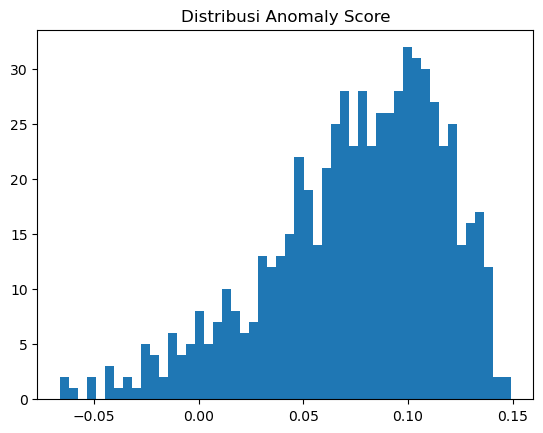

In [228]:
plt.hist(anom_score_test, bins=50)
plt.title("Distribusi Anomaly Score")
plt.show()

In [229]:
# Cek air potable tapi anomali
## Gunakan data test clf sebagai proxy ground truth
y_proxy = (clf_y_test == 1).astype(int)  # Anggap Potability = 1 sebagai anomali

## Prediksi Anomali
y_anom = (anom_flag_test == -1).astype(int)

## Evaluasi model anomali
classification_rep_anom = classification_report(y_proxy, y_anom)
print(classification_rep_anom)

              precision    recall  f1-score   support

           0       0.61      0.94      0.74       400
           1       0.46      0.07      0.13       256

    accuracy                           0.61       656
   macro avg       0.54      0.51      0.44       656
weighted avg       0.56      0.61      0.50       656



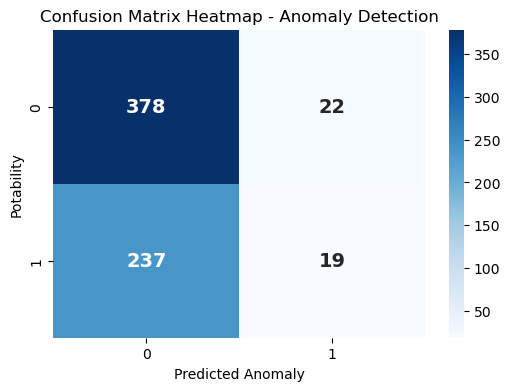

In [231]:
# Cofusion matrix anomali
conf_matrix_anom = confusion_matrix(y_proxy, y_anom)
# heatmap 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_anom, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Predicted Anomaly')
plt.ylabel('Potability')
plt.title('Confusion Matrix Heatmap - Anomaly Detection')
plt.show()

# Risk Assessment

In [243]:
# Input data risk assessment
y_pred = y_pred_clf  # 1 potable, 0 non-potable
anom_flag = anom_flag_test  # -1 anomali, 1 normal

In [244]:
# Integrasi risk assessment
risk_label = np.empty(len(y_pred_clf), dtype=object)

# Potable + Normal
risk_label[(y_pred == 1) & (anom_flag == 1)]  = "AMAN"

# Potable + Anomali
risk_label[(y_pred == 1) & (anom_flag == -1)] = "PERLU DICEK"

# Non-Potable + Normal
risk_label[(y_pred == 0) & (anom_flag == 1)]  = "TIDAK LAYAK"

# Non-Potable + Anomali
risk_label[(y_pred == 0) & (anom_flag == -1)] = "KRITIS"

In [246]:
# Output Rekomendasi Final berdasarkan risk_label
## mapping rekomendasi
recommendations = {
    "AMAN": "Air layak konsumsi dan dapat didistribusikan. Tetap monitoring rutin kualitas air.",
    "PERLU DICEK": "Air layak konsumsi, namun disarankan untuk melakukan pengecekan lebih lanjut.",
    "TIDAK LAYAK": "Air tidak layak konsumsi. Perlu optimasi proses pengolahan air dan pengecekan lebih lanjut.",
    "KRITIS": "Air sangat tidak layak konsumsi. Terdapat konsentrasi polutan yang sangat tidak wajar dan wajib verifikasi lab."
}

In [ ]:
if risk_label == "AMAN":
    print("Air layak konsumsi dan dapat didistribusikan. Tetap monitoring rutin kualitas air.")
elif risk_label == "PERLU DICEK":
    print("Air layak konsumsi, namun disarankan untuk melakukan pengecekan lebih lanjut.")
elif risk_label == "TIDAK LAYAK":
    print("Air tidak layak konsumsi. Perlu optimasi proses pengolahan air dan pengecekan lebih lanjut.")
elif risk_label == "KRITIS":
    print("Air sangat tidak layak konsumsi. Terdapat konsentrasi polutan yang sangat tidak wajar dan wajib verifikasi lab.")

In [249]:
# reverse scaling
# scaler = pd.read_pickle('../preprocessing/scaler.pkl')

# risk_df = scaler.inverse_transform(clf_X_test.copy())
# risk_df = pd.DataFrame(risk_df, columns=clf_X_test.columns)

In [252]:
# Assesst
risk_df = clf_X_test.copy()
risk_df['anom_score'] = anom_score_test
risk_df['anom_flag'] = anom_flag
risk_df['potability_pred'] = y_pred
risk_df['risk_label'] = risk_label
risk_df['recommendation'] = risk_df['risk_label'].map(recommendations)

risk_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,anom_score,anom_flag,potability_pred,risk_label,recommendation
0,-0.030569,-0.238336,-0.325470,-0.676788,-0.019216,-0.492411,0.265884,0.781086,-1.602336,0.125261,1,0,TIDAK LAYAK,Air tidak layak konsumsi. Perlu optimasi prose...
1,-0.617506,-0.267650,-1.300395,0.379131,-0.310487,0.484065,2.112074,0.126600,0.200210,0.070116,1,0,TIDAK LAYAK,Air tidak layak konsumsi. Perlu optimasi prose...
2,-0.030569,-0.617017,0.469844,0.433350,0.680667,-1.134013,0.053165,1.523568,0.559978,0.114431,1,0,TIDAK LAYAK,Air tidak layak konsumsi. Perlu optimasi prose...
3,-0.483725,1.189652,1.435043,1.284983,-1.060448,-0.871123,-1.535066,-0.435916,-2.176229,0.022768,1,0,TIDAK LAYAK,Air tidak layak konsumsi. Perlu optimasi prose...
4,-0.639037,0.041532,0.548021,0.294471,-0.125254,1.484732,0.474402,-1.576772,1.776070,0.059660,1,0,TIDAK LAYAK,Air tidak layak konsumsi. Perlu optimasi prose...


In [ ]:
# Export
# risk_df.to_csv('../output/water_quality_assessment_results.csv', index=False)